Download hadoop in the virtual Linux machine allocated by Google Colab

In [1]:
!wget https://downloads.apache.org/hadoop/common/hadoop-3.3.6/hadoop-3.3.6.tar.gz

--2024-08-06 00:48:45--  https://downloads.apache.org/hadoop/common/hadoop-3.3.6/hadoop-3.3.6.tar.gz
Resolving downloads.apache.org (downloads.apache.org)... 88.99.208.237, 135.181.214.104, 2a01:4f8:10a:39da::2, ...
Connecting to downloads.apache.org (downloads.apache.org)|88.99.208.237|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 730107476 (696M) [application/x-gzip]
Saving to: ‘hadoop-3.3.6.tar.gz’

hadoop-3.3.6.tar.gz 100%[===================>] 696.28M  10.9MB/s    in 59s     

2024-08-06 00:49:44 (11.8 MB/s) - ‘hadoop-3.3.6.tar.gz’ saved [730107476/730107476]



The file we downloaded is an archive, so we need to extract the files

In [14]:
!tar -xzf hadoop-3.3.6.tar.gz

copying the hadoop libraries to /usr/local

In [3]:
!cp -r hadoop-3.3.6 /usr/local

Java is used to write Hadoop. We need the Java SDK in order to make it operate. Fortunately, Java is already installed when Google Colab is used; all we need to do is find its location.


In [4]:
!readlink -f /usr/bin/java | sed "s:bin/java::"

/usr/lib/jvm/java-11-openjdk-amd64/


to set up the previously mentioned path as the value for the Java path variable. On a typical Linux system, the command EXPORT would accomplish this. Once more, due to the unique configuration of the Google Colab virtual machine, we must use Python to set this global variable.


In [5]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64/"

Test if the global JAVA_HOME variable is set to the right path:

In [6]:
!echo $JAVA_HOME

/usr/lib/jvm/java-11-openjdk-amd64/


Now let's add some data to the PATH global variable. When a command is executed in Linux, the PATH variable is an environment variable that holds an ordered list of paths where executables can be found. We can run commands without having to specify an absolute path if we use these paths.

In order to avoid having to write out the whole path of the Hadoop program we wish to run each time, we will add our Hadoop libraries to this PATH variable.


In [7]:
import os
os.environ['PATH'] += ':/usr/local/hadoop-3.3.6/bin'

In [8]:
!hadoop jar /usr/local/hadoop-3.3.6/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar  -files /content/Mapper_Director.py,/content/Reducer_director.py -input /content/imdb_top_1000.csv -output /content/output/Test_Director -mapper 'python Mapper_Director.py'  -reducer 'python Reducer_director.py'

2024-08-06 00:50:45,234 INFO impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties
2024-08-06 00:50:45,506 INFO impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).
2024-08-06 00:50:45,506 INFO impl.MetricsSystemImpl: JobTracker metrics system started
2024-08-06 00:50:45,540 WARN impl.MetricsSystemImpl: JobTracker metrics system already initialized!
2024-08-06 00:50:45,885 INFO mapred.FileInputFormat: Total input files to process : 1
2024-08-06 00:50:45,912 INFO mapreduce.JobSubmitter: number of splits:1
2024-08-06 00:50:46,344 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_local1655370449_0001
2024-08-06 00:50:46,344 INFO mapreduce.JobSubmitter: Executing with tokens: []
2024-08-06 00:50:46,752 INFO mapred.LocalDistributedCacheManager: Localized file:/content/Mapper_Director.py as file:/tmp/hadoop-root/mapred/local/job_local1655370449_0001_6ae22766-cccf-4015-9e07-23e3840e31a0/Mapper_Director.py
2024-08-06 00:50:46,782 INFO mapred.Local

In [9]:
!hadoop jar /usr/local/hadoop-3.3.6/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar  -files /content/Mapper_Actor.py,/content/Reducer_Actor.py -input /content/imdb_top_1000.csv -output /content/output/Test_Actor -mapper 'python Mapper_Actor.py'  -reducer 'python Reducer_Actor.py'


2024-08-06 00:50:54,805 INFO impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties
2024-08-06 00:50:54,997 INFO impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).
2024-08-06 00:50:54,997 INFO impl.MetricsSystemImpl: JobTracker metrics system started
2024-08-06 00:50:55,019 WARN impl.MetricsSystemImpl: JobTracker metrics system already initialized!
2024-08-06 00:50:55,326 INFO mapred.FileInputFormat: Total input files to process : 1
2024-08-06 00:50:55,353 INFO mapreduce.JobSubmitter: number of splits:1
2024-08-06 00:50:55,705 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_local2016967_0001
2024-08-06 00:50:55,705 INFO mapreduce.JobSubmitter: Executing with tokens: []
2024-08-06 00:50:56,115 INFO mapred.LocalDistributedCacheManager: Localized file:/content/Mapper_Actor.py as file:/tmp/hadoop-root/mapred/local/job_local2016967_0001_8083d754-b23e-4a56-a50f-a65379c9c49c/Mapper_Actor.py
2024-08-06 00:50:56,152 INFO mapred.LocalDistributedC

In [10]:
!hdfs dfs -cat /content/output/Test_Director//part-00000


Aamir Khan	8.216666666666667	5351375.166666667
Aaron Taylor-Johnson	7.6	48071303.0
Abhay Deol	8.0	10950.0
Abraham Attah	7.7	83861.0
Adam Driver	7.9	2000000.0
Adrian Molina	8.4	209726015.0
Adrien Brody	8.1	16321877.0
Ajay Devgn	8.2	739478.0
Akshay Kumar	8.0	1079369.0
Al Pacino	8.010000000000002	47028078.1
Alain Delon	8.1	39481.0
Alan Mak	8.0	169659.0
Alejandro Jodorowsky	7.9	61001.0
Aleksandr Antonov	8.0	50970.0
Aleksey Serebryakov	7.6	1092800.0
Alicia Vikander	7.7	25442958.0
Alisa Freyndlikh	8.2	234723.0
Amit Sadh	7.7	1122527.0
Amitabh Bachchan	8.2	733094.0
Amole Gupte	8.4	1223869.0
Amy Adams	7.9	100546139.0
Amy Poehler	7.6	19202743.0
Anamaria Marinca	7.9	1185783.0
Anatoliy Solonitsyn	8.1	102021.0
Andie MacDowell	7.7	6110979.0
Andreas Wilson	7.8	15280.0
Andrew Garfield	8.1	67209615.0
Andrew Marton	7.8	39100000.0
Andrew Philpot	7.7	151086.0
Angelina Jolie	7.7	35739802.0
Anne Dorval	8.1	3492754.0
Ansel Elgort	7.6	107825862.0
Anthony Hopkins	7.8	14041546.0
Anthony Perkins	8.5	32000000.0
A

In [11]:
!hdfs dfs -cat /content/output/Test_Actor//part-00000


Aamir Khan	8.242857142857142	4761731.428571428
Aaron Eckhart	9.0	534858444.0
Aaron Taylor-Johnson	7.6	48071303.0
Abdel Ahmed Ghili	8.1	309811.0
Abhay Deol	8.05	1559717.5
Abigail Breslin	7.6	75590286.0
Abraham Attah	7.7	83861.0
Adam Baldwin	8.3	46357676.0
Adam Driver	7.9	2000000.0
Adel Bencherif	7.9	2084637.0
Adil Hussain	7.85	63328898.0
Adrian Molina	8.4	209726015.0
Adrien Brody	8.1	30581357.333333332
Adèle Exarchopoulos	7.7	2199675.0
Adèle Haenel	8.1	3759854.0
Agnes Moorehead	8.3	1585634.0
Ahmet Mümtaz Taylan	7.9	138730.0
Ahna Capri	7.7	25000000.0
Ahney Her	8.1	148095302.0
Aidan Gillen	7.9	3237118.0
Aitana Sánchez-Gijón	7.7	1082715.0
Ajay Devgn	8.2	739478.0
Ajay Naidu	7.7	10824921.0
Akihiro Miwa	8.2	4711096.0
Akio Ôtsuka	8.0	515905.0
Akira Terao	8.2	4135750.0
Akshay Kumar	8.05	1001295.0
Akshaye Khanna	8.1	300000.0
Al Pacino	8.076923076923078	49324029.92307692
Alain Delon	8.1	39481.0
Alakina Mann	7.6	96522687.0
Alan Alda	7.6	72313754.0
Alan Arkin	7.733333333333333	54767157.333333336
Al

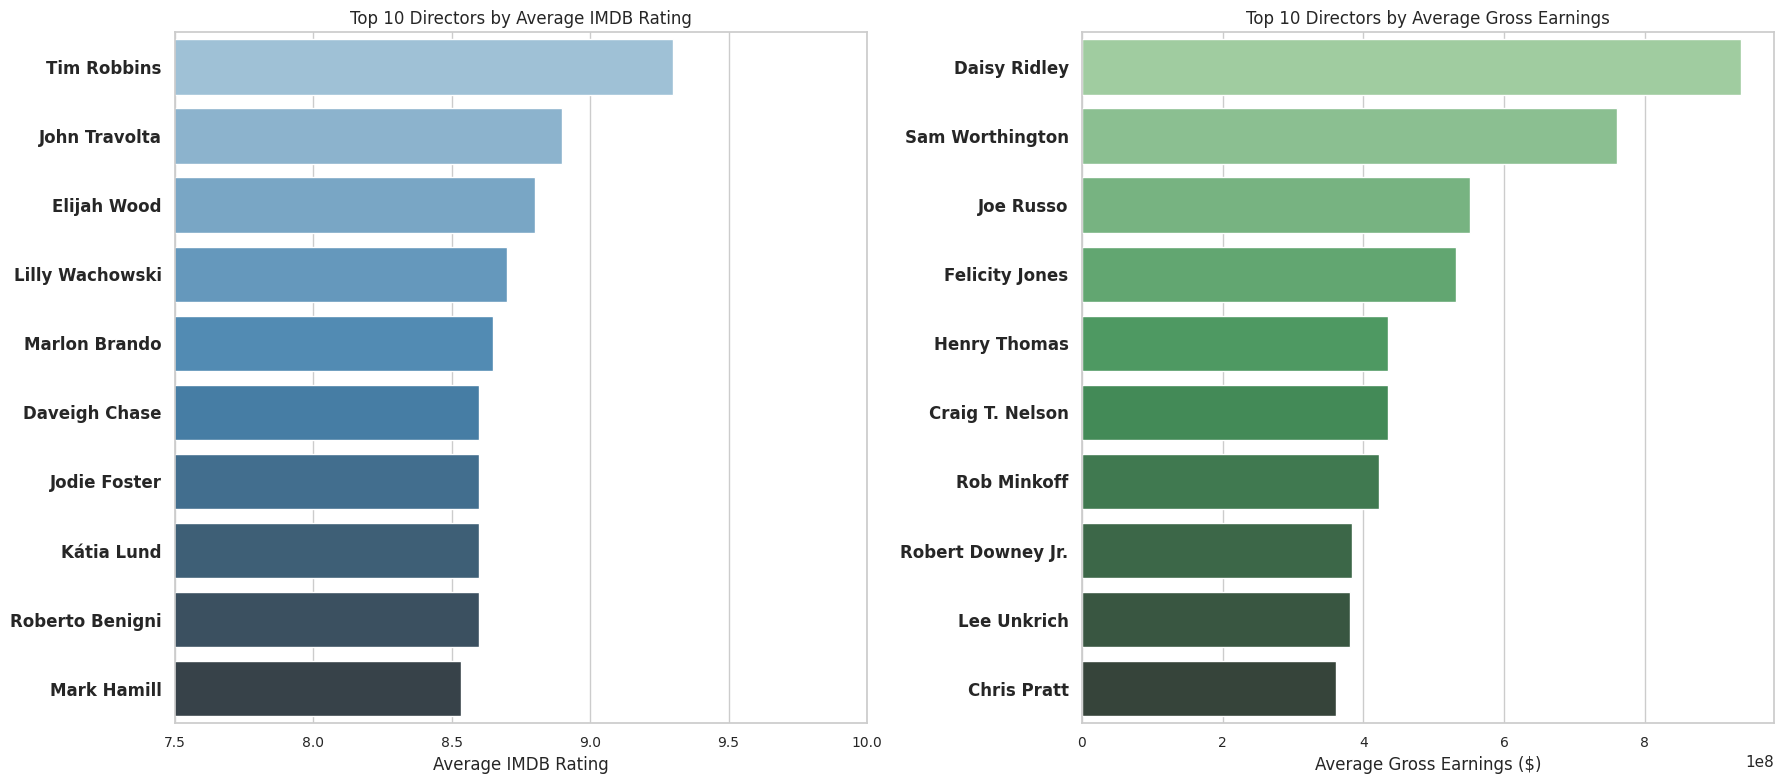

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def parse_gross(gross_str):
    if gross_str:
        return float(gross_str.replace(',', ''))
    return 0

# Read the data from the file
file_path = '/content/output/Test_Director//part-00000'

data = []
with open(file_path, 'r') as file:
    for line in file:
        try:
            parts = line.strip().split('\t')
            if len(parts) == 3:
                director, imdb_rating, gross = parts
                imdb_rating = float(imdb_rating)
                gross = parse_gross(gross)
                data.append((director, imdb_rating, gross))
        except Exception as e:
            continue

# Create a DataFrame
df = pd.DataFrame(data, columns=["Director", "Avg_IMDB_Rating", "Avg_Gross"])

# Calculate average values for each director
df_avg = df.groupby("Director").mean().reset_index()

# Top 10 directors by average IMDB rating
top_10_imdb = df_avg.nlargest(10, 'Avg_IMDB_Rating')

# Top 10 directors by average gross earnings
top_10_gross = df_avg.nlargest(10, 'Avg_Gross')

# Set the style
sns.set(style="whitegrid")

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Top 10 IMDB Ratings
sns.barplot(x="Avg_IMDB_Rating", y="Director", hue="Director", data=top_10_imdb, ax=axes[0], palette="Blues_d", dodge=False, legend=False)
axes[0].set_xlabel('Average IMDB Rating')
axes[0].set_title('Top 10 Directors by Average IMDB Rating')
axes[0].set_xlim(7.5, 10)  # Adjust x-axis limit for better visual comparison

# Top 10 Gross Earnings
sns.barplot(x="Avg_Gross", y="Director", hue="Director", data=top_10_gross, ax=axes[1], palette="Greens_d", dodge=False, legend=False)
axes[1].set_xlabel('Average Gross Earnings ($)')
axes[1].set_title('Top 10 Directors by Average Gross Earnings')

# Formatting the plots
for ax in axes:
    for label in ax.get_yticklabels():
        label.set_fontsize(12)
        label.set_fontweight('bold')
    for label in ax.get_xticklabels():
        label.set_fontsize(10)
    ax.set_ylabel('')

plt.tight_layout()
plt.show()


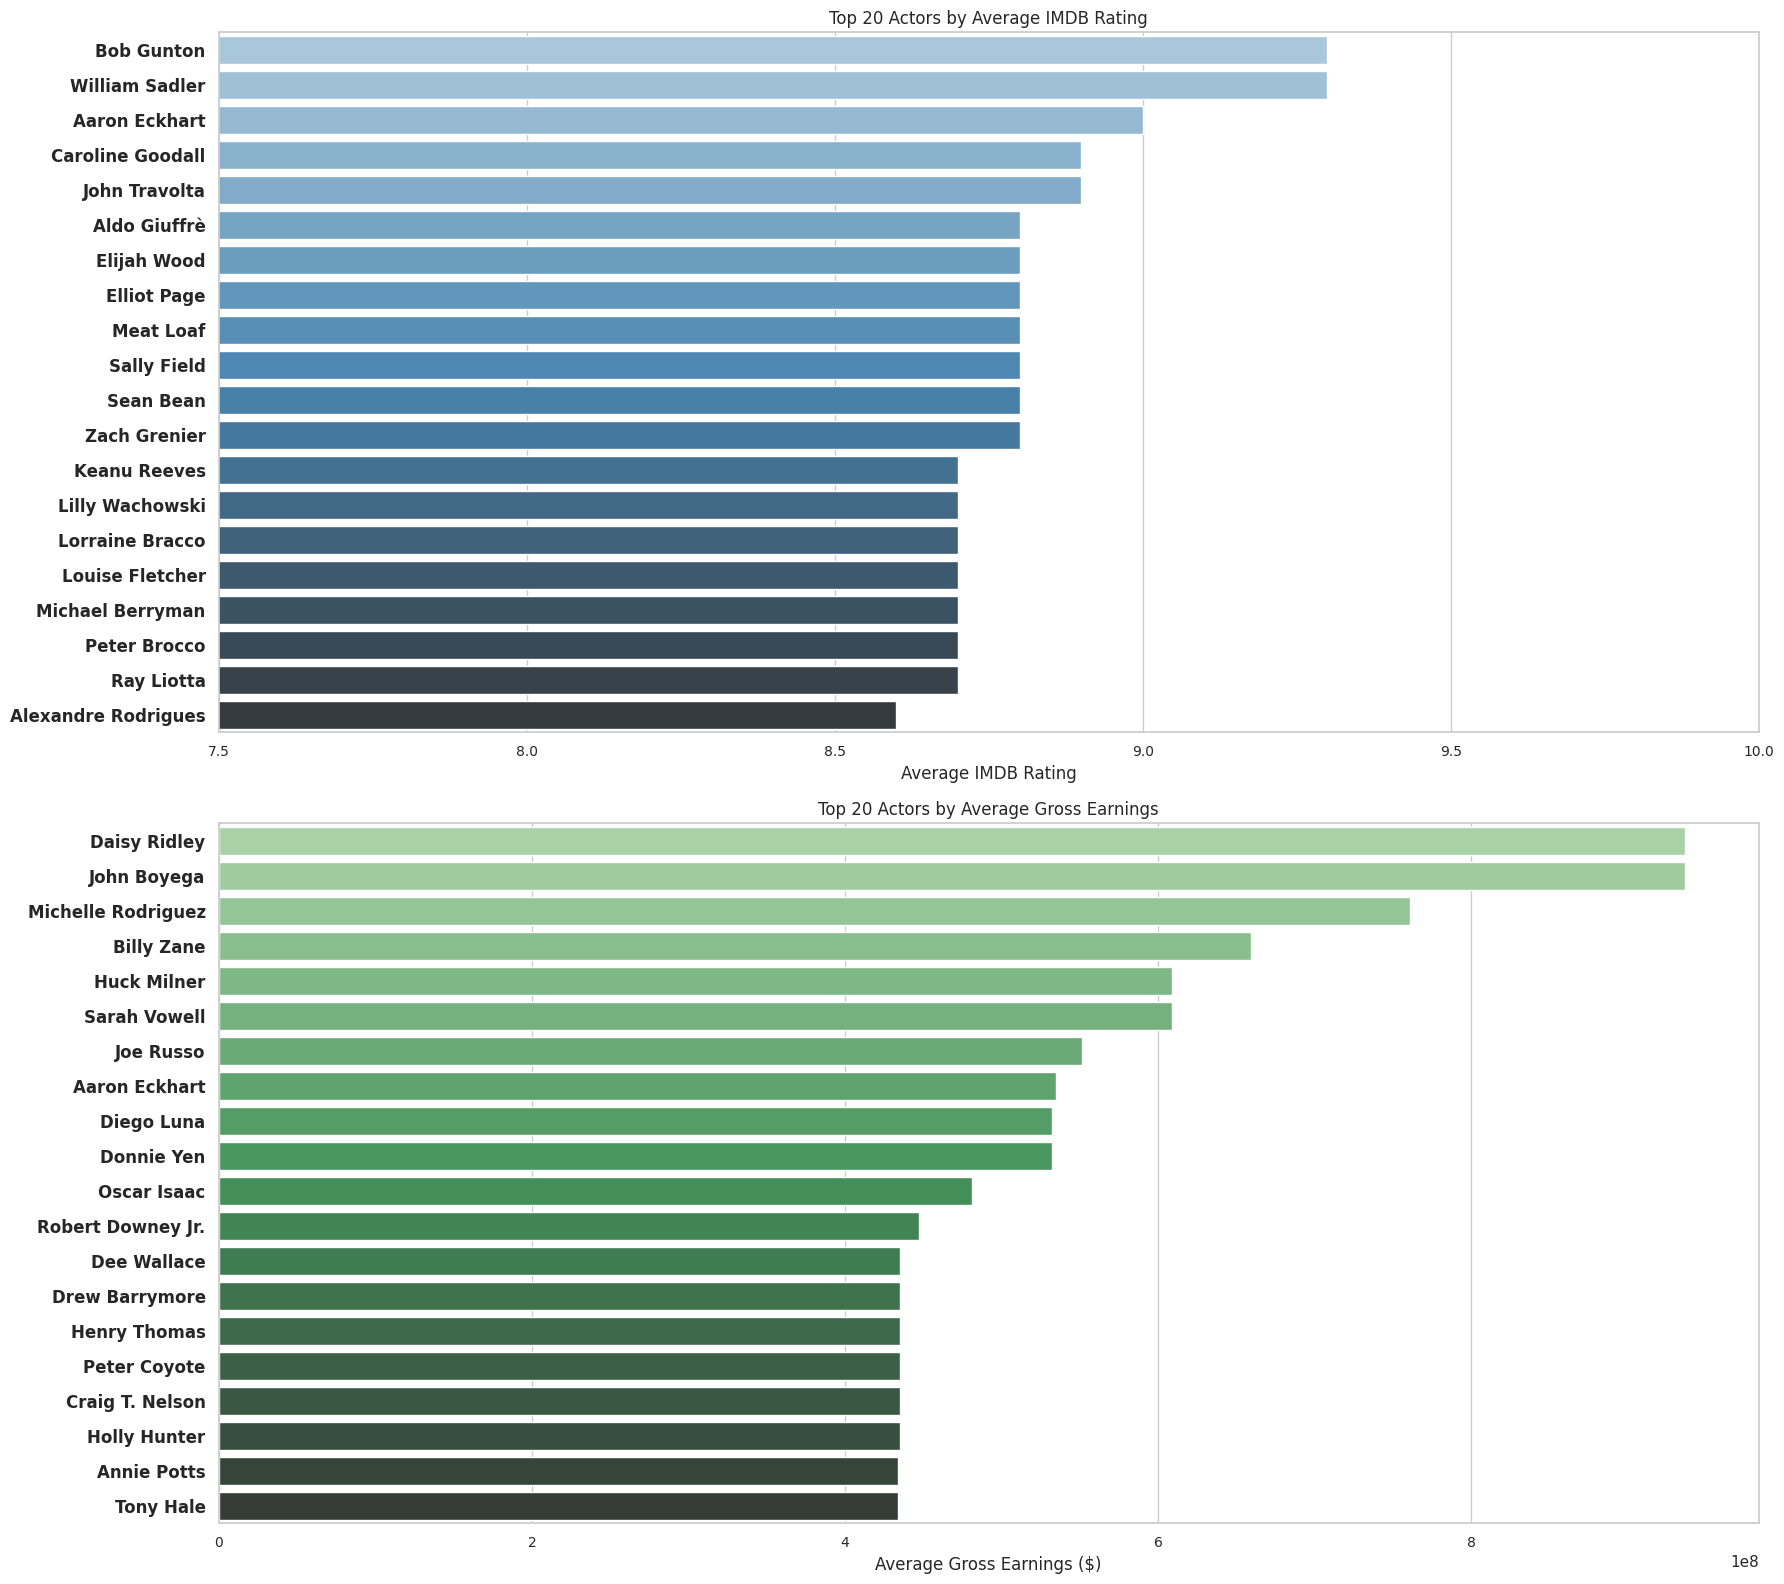

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def parse_gross(gross_str):
    if gross_str:
        return float(gross_str.replace(',', ''))
    return 0

# Read the data from the file
file_path = '/content/output/Test_Actor//part-00000'

data = []
with open(file_path, 'r') as file:
    for line in file:
        try:
            parts = line.strip().split('\t')
            if len(parts) == 3:
                actor, imdb_rating, gross = parts
                imdb_rating = float(imdb_rating)
                gross = parse_gross(gross)
                data.append((actor, imdb_rating, gross))
        except Exception as e:
            continue

# Create a DataFrame
df = pd.DataFrame(data, columns=["Actor", "Avg_IMDB_Rating", "Avg_Gross"])

# Calculate average values for each actor
df_avg = df.groupby("Actor").mean().reset_index()

# Top 20 actors by average IMDB rating
top_20_imdb = df_avg.nlargest(20, 'Avg_IMDB_Rating')

# Top 20 actors by average gross earnings
top_20_gross = df_avg.nlargest(20, 'Avg_Gross')

# Set the style
sns.set(style="whitegrid")

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(18, 16))

# Top 20 IMDB Ratings
sns.barplot(x="Avg_IMDB_Rating", y="Actor", hue="Actor", data=top_20_imdb, ax=axes[0], palette="Blues_d", dodge=False, legend=False)
axes[0].set_xlabel('Average IMDB Rating')
axes[0].set_title('Top 20 Actors by Average IMDB Rating')
axes[0].set_xlim(7.5, 10)  # Adjust x-axis limit for better visual comparison

# Top 20 Gross Earnings
sns.barplot(x="Avg_Gross", y="Actor", hue="Actor", data=top_20_gross, ax=axes[1], palette="Greens_d", dodge=False, legend=False)
axes[1].set_xlabel('Average Gross Earnings ($)')
axes[1].set_title('Top 20 Actors by Average Gross Earnings')

# Formatting the plots
for ax in axes:
    for label in ax.get_yticklabels():
        label.set_fontsize(12)
        label.set_fontweight('bold')
    for label in ax.get_xticklabels():
        label.set_fontsize(10)
    ax.set_ylabel('')

plt.tight_layout()
plt.show()
